# Techniques avancées de manipulation d'images

Ce chapitre explore des techniques plus avancées de traitement d'images en utilisant NumPy et d'autres bibliothèques spécialisées. Nous aborderons l'analyse de la distribution des pixels via des histogrammes, l'ajustement de la luminosité et du contraste, l'application de filtres de convolution pour le lissage et la détection de contours.

---

## Concepts clés

- **Histogrammes** : analyse de la distribution des intensités
- **Ajustement de luminosité et contraste** : modification des valeurs de pixels
- **Filtres de convolution** : lissage et détection de contours
- **Détection de contours** : identification des transitions d'intensité

In [9]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, io
from scipy.ndimage import gaussian_filter, sobel

---

## Chargement des images d'exemple

Nous utiliserons des images de la bibliothèque `scikit-image` pour illustrer les différentes techniques.

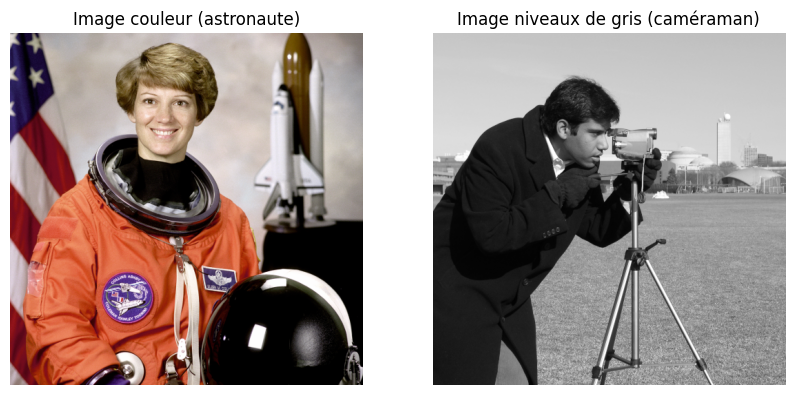

In [10]:
# Charger deux images de la bibliothèque scikit-image
image_couleur = data.astronaut()  # Image couleur RGB (512x512x3)
image_gris = data.camera()        # Image en niveaux de gris (512x512)

# Afficher les deux images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_couleur)
axes[0].set_title("Image couleur (astronaute)")
axes[0].axis('off')

axes[1].imshow(image_gris, cmap='gray')
axes[1].set_title("Image niveaux de gris (caméraman)")
axes[1].axis('off')

plt.show()

---

## Histogrammes : analyse de la distribution des pixels

Un histogramme d'image représente la distribution des intensités de pixels. C'est un outil essentiel pour évaluer la luminosité, le contraste et la gamme tonale d'une image. 

Pour tracer un histogramme, l'image 2D est d'abord "aplatie" en un tableau 1D avec la méthode `.ravel()`.

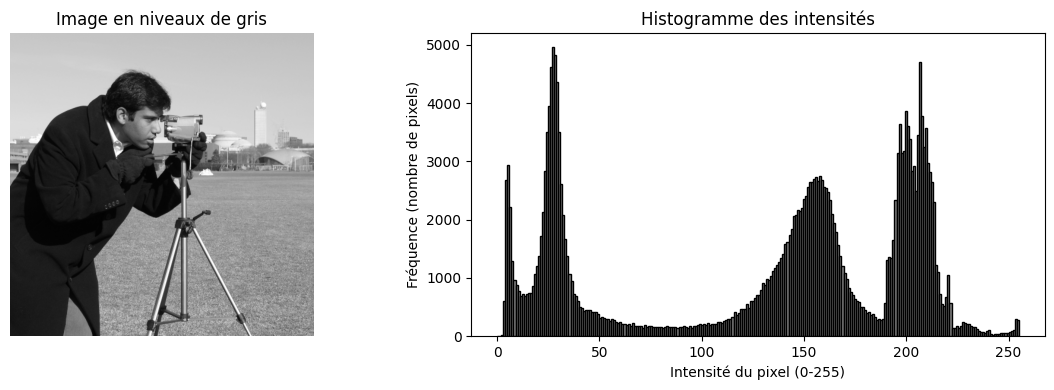

In [11]:
# Analyser la distribution des intensités de l'image en niveaux de gris
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Afficher l'image
axes[0].imshow(image_gris, cmap='gray')
axes[0].set_title("Image en niveaux de gris")
axes[0].axis('off')

# Tracer l'histogramme
# .ravel() convertit la matrice 2D en tableau 1D
# bins=256 crée 256 intervalles (une par valeur possible de 0 à 255)
axes[1].hist(image_gris.ravel(), bins=256, range=(0, 255), color='gray', edgecolor='black')
axes[1].set_title("Histogramme des intensités")
axes[1].set_xlabel("Intensité du pixel (0-255)")
axes[1].set_ylabel("Fréquence (nombre de pixels)")

plt.tight_layout()
plt.show()

---

## Ajustement de la luminosité et du contraste

Ces ajustements sont réalisés par des opérations arithmétiques directes sur les valeurs de pixels :

- **Luminosité** : Ajouter une constante à chaque pixel augmente ou diminue la luminosité globale
- **Contraste** : Multiplier par un facteur amplifie les différences entre pixels

Important : utiliser `np.clip()` pour s'assurer que les valeurs restent dans `[0, 255]`.

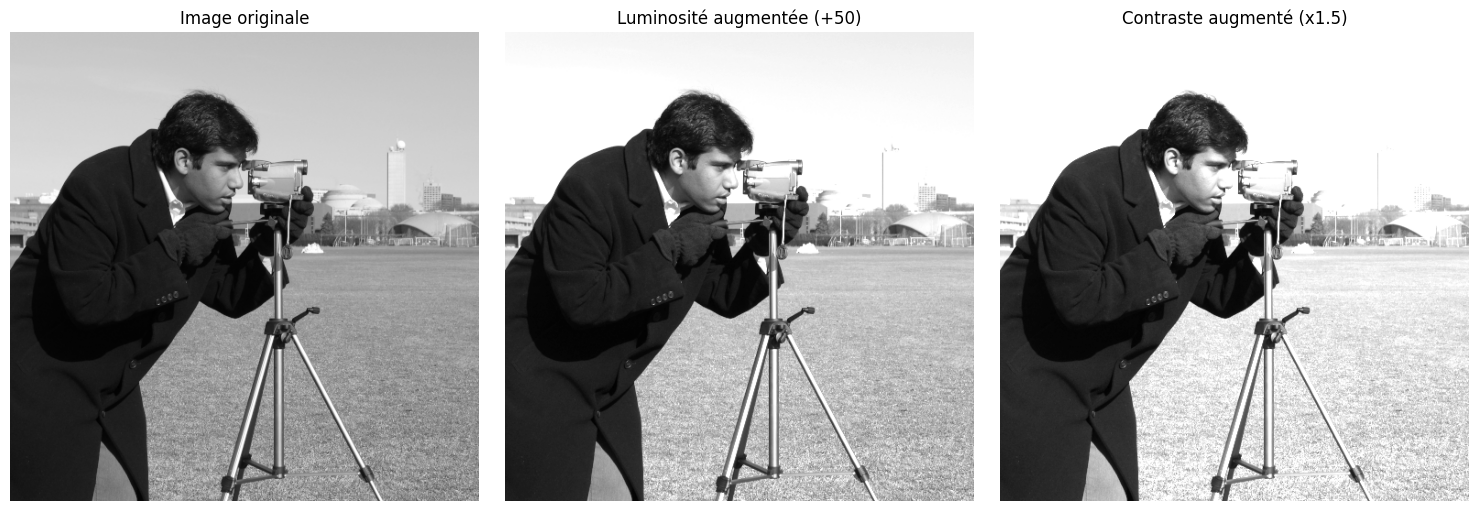

In [12]:
# Ajustement de la luminosité en additionnant une constante
# Conversion en int temporaire pour éviter les débordements
image_plus_lumineuse = np.clip(image_gris.astype(int) + 50, 0, 255).astype(np.uint8)

# Augmentation du contraste en multipliant par un facteur
# Pixels lumineux deviennent plus lumineux, pixels sombres plus sombres
image_plus_contrastee = np.clip(image_gris.astype(float) * 1.5, 0, 255).astype(np.uint8)

# Afficher les trois versions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image_gris, cmap='gray')
axes[0].set_title("Image originale")
axes[0].axis('off')

axes[1].imshow(image_plus_lumineuse, cmap='gray')
axes[1].set_title("Luminosité augmentée (+50)")
axes[1].axis('off')

axes[2].imshow(image_plus_contrastee, cmap='gray')
axes[2].set_title("Contraste augmenté (x1.5)")
axes[2].axis('off')

plt.tight_layout()
plt.show()

---

## Filtres de convolution : flou gaussien

La convolution est une opération fondamentale en traitement d'images où chaque pixel de sortie est calculé comme une moyenne pondérée des pixels voisins de l'entrée.

Le **filtre gaussien** est un filtre de lissage qui réduit le bruit et adoucit les transitions. Le paramètre `sigma` contrôle l'intensité du lissage.

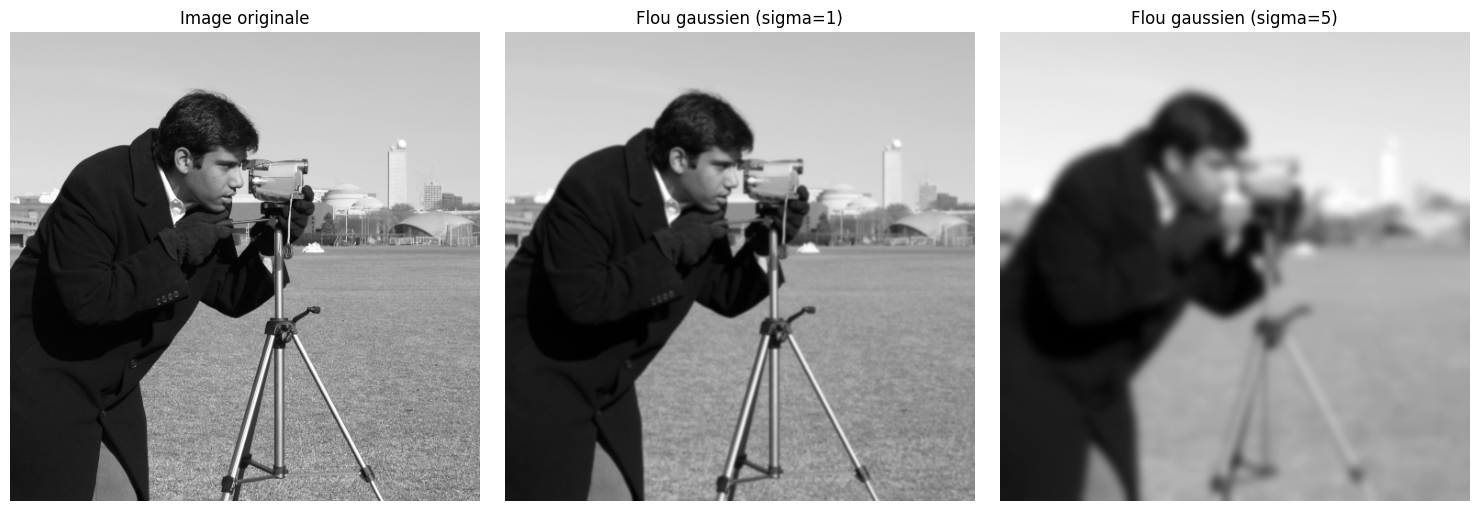

In [13]:
# Appliquer le filtre gaussien avec différentes intensités
image_floue_legere = gaussian_filter(image_gris, sigma=1)
image_floue_forte = gaussian_filter(image_gris, sigma=5)

# Afficher les résultats
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image_gris, cmap='gray')
axes[0].set_title("Image originale")
axes[0].axis('off')

axes[1].imshow(image_floue_legere, cmap='gray')
axes[1].set_title("Flou gaussien (sigma=1)")
axes[1].axis('off')

axes[2].imshow(image_floue_forte, cmap='gray')
axes[2].set_title("Flou gaussien (sigma=5)")
axes[2].axis('off')

plt.tight_layout()
plt.show()

---

## Détection de contours : filtre de Sobel

La détection de contours vise à identifier les régions d'une image où les changements d'intensité sont abrupts. Le **filtre de Sobel** calcule une approximation du gradient d'intensité, révélant ainsi les contours de l'image.

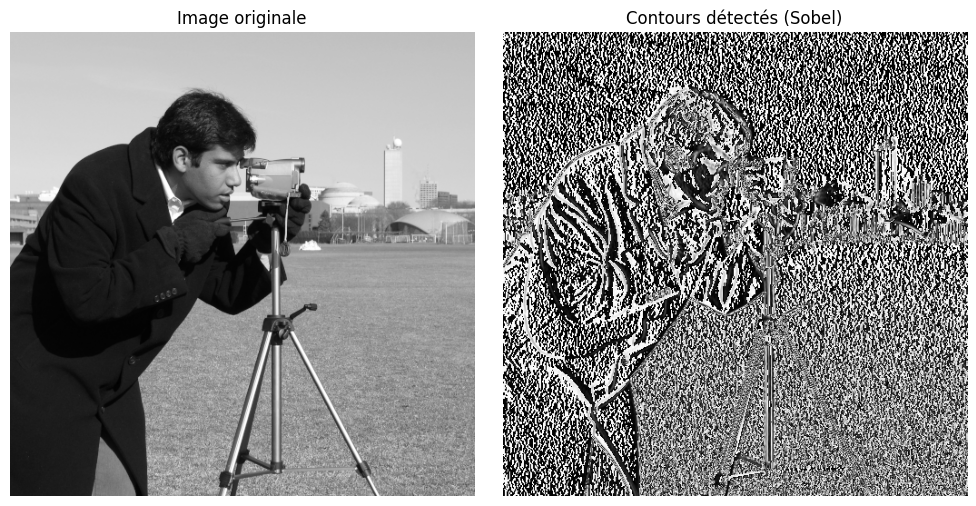

In [14]:
# Appliquer le filtre de Sobel pour détecter les contours
contours = sobel(image_gris)

# Afficher l'image originale et les contours détectés
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image_gris, cmap='gray')
axes[0].set_title("Image originale")
axes[0].axis('off')

axes[1].imshow(contours, cmap='gray')
axes[1].set_title("Contours détectés (Sobel)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

---

## Composition d'images : blending

La composition d'images (blending) consiste à fusionner deux images en calculant une moyenne pondérée. Cela crée des effets de transparence ou de superposition.

**Formule** : `resultat = image1 * alpha + image2 * (1 - alpha)`

Important : les deux images doivent avoir les mêmes dimensions.

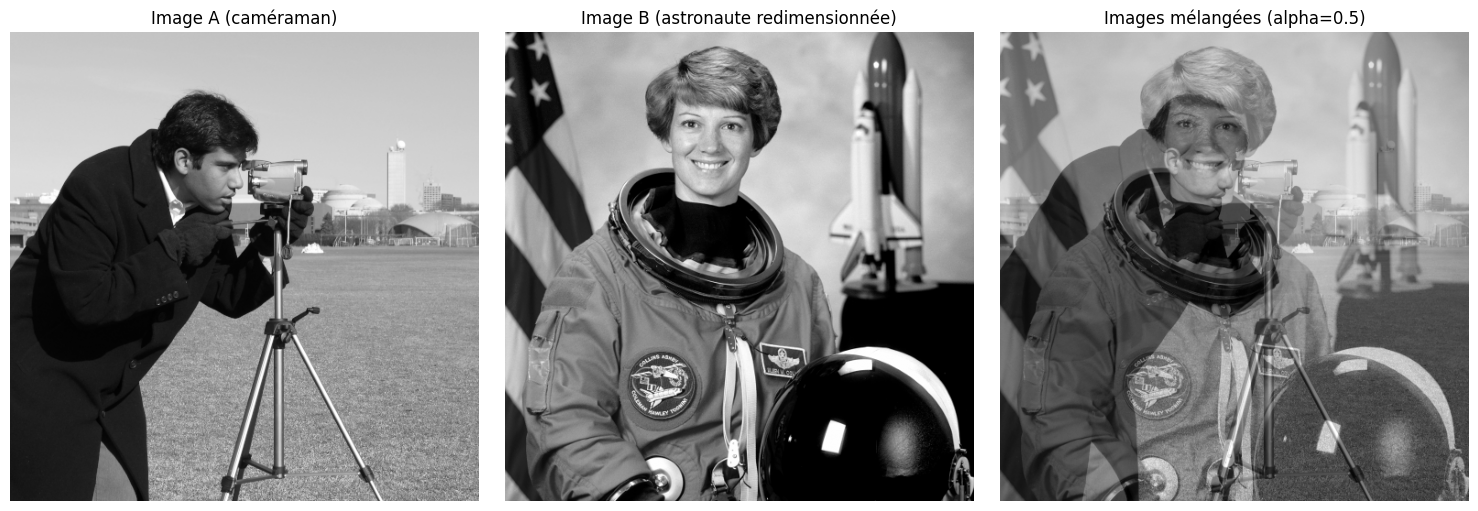

In [15]:
from skimage.transform import resize
from skimage.color import rgb2gray

# Charger et préparer deux images de même taille
image_a = data.camera()
image_b_couleur = data.astronaut()

# Convertir en niveaux de gris et redimensionner
image_b_gris = rgb2gray(image_b_couleur)
image_b_redimensionnee = resize(image_b_gris, image_a.shape)

# Définir le facteur de mélange (0.5 pour un équilibre 50/50)
alpha = 0.5
image_a = image_a / 255.0  # Normaliser entre 0 et 1
image_b_redimensionnee = image_b_redimensionnee / 1.0  # Déjà entre 0 et 1
image_melangee = (image_a * alpha + image_b_redimensionnee * (1 - alpha))

# Afficher les résultats
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image_a, cmap='gray')
axes[0].set_title("Image A (caméraman)")
axes[0].axis('off')

axes[1].imshow(image_b_redimensionnee, cmap='gray')
axes[1].set_title("Image B (astronaute redimensionnée)")
axes[1].axis('off')

axes[2].imshow(image_melangee, cmap='gray')
axes[2].set_title(f"Images mélangées (alpha={alpha})")
axes[2].axis('off')

plt.tight_layout()
plt.show()

---

## Résumé

- Les **histogrammes** permettent d'analyser la distribution des intensités
- **Luminosité** et **contraste** se modifient par opérations arithmétiques simples
- Le **filtre gaussien** lisse les images en supprimant les détails fins
- Le **filtre de Sobel** détecte les contours via le calcul du gradient
- Le **blending** fusionne deux images via moyenne pondérée

Prochain chapitre : `f_image_analysis.ipynb`